In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans


Importing data

In [2]:
df = pd.read_csv(r'C:\Users\chavali\Desktop\Data science\clustering/Country-data.csv',sep=",", encoding="ISO-8859-1", header=0)
df1=df
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

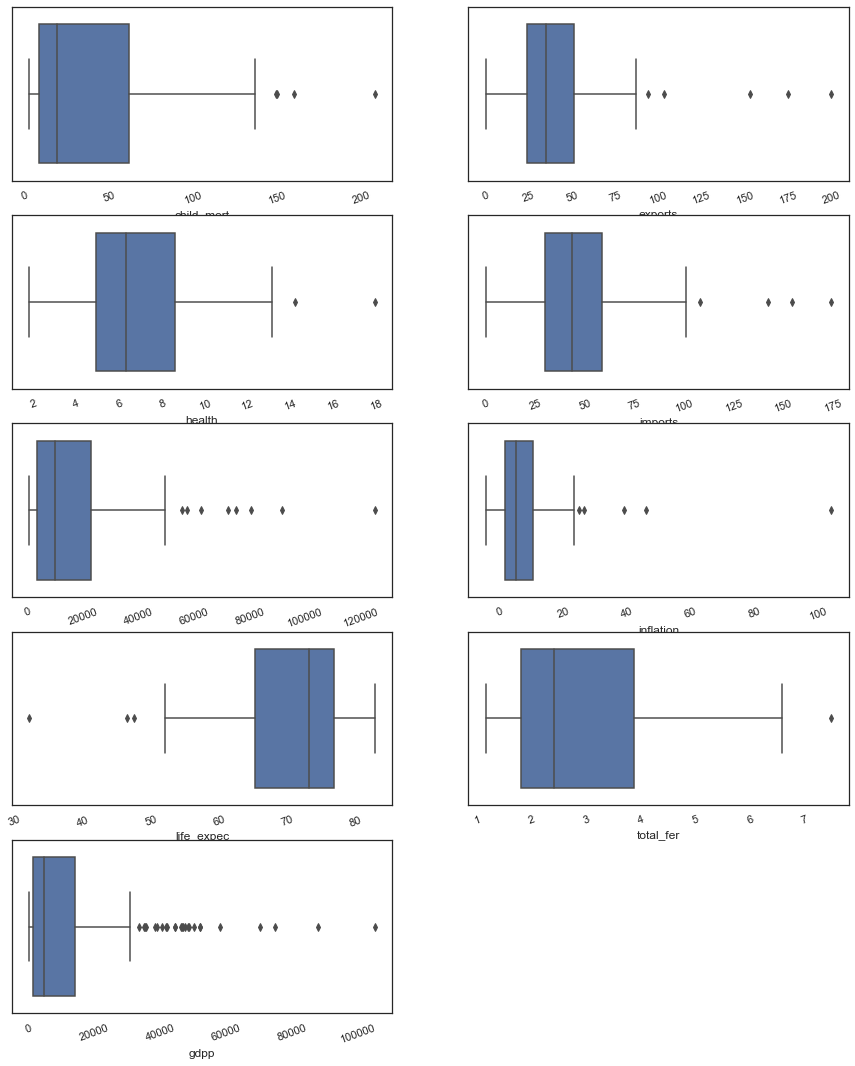

In [6]:
# checking for the outliers 
plt.figure(figsize=(15,30))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(8, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)
    plt.xticks(rotation = 20)

In [7]:
# outlier treatment 

Q1 = df['child_mort'].quantile(0.01)
Q4 = df['child_mort'].quantile(0.97)
df['child_mort'][df['child_mort'] >= Q4]=Q4
df.shape

(167, 10)

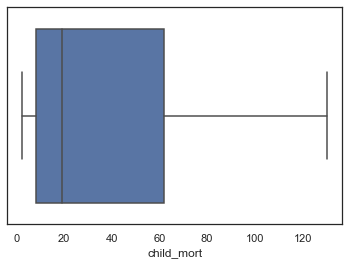

In [8]:
sns.boxplot(x='child_mort', data=df)

In [9]:
# capping all the component depending on the outlier values
Q1 = df['exports'].quantile(0.01)
Q4 = df['exports'].quantile(0.97)
df['exports'][df['exports'] >= Q4]=Q4
df.shape

(167, 10)

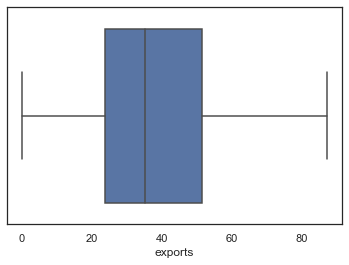

In [10]:
sns.boxplot(x='exports', data=df)

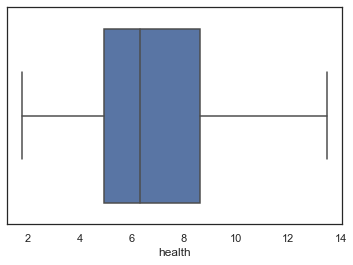

In [11]:
Q4 = df['health'].quantile(0.99)
df['health'][df['health'] >= Q4]=Q4
df.shape
sns.boxplot(x='health', data=df)

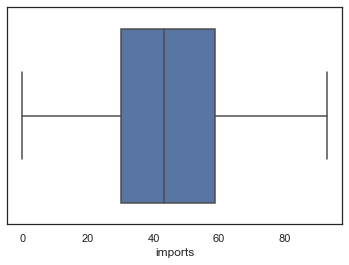

In [12]:
Q4 = df['imports'].quantile(0.97)
df['imports'][df['imports'] >= Q4]=Q4
df.shape
sns.boxplot(x='imports', data=df)

In [13]:
Q4 = df['income'].quantile(0.95)
df['income'][df['income'] >= Q4]=Q4
df.shape

(167, 10)

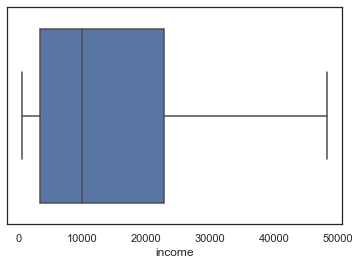

In [14]:
sns.boxplot(x='income', data=df)

In [15]:
Q4 = df['inflation'].quantile(0.97)
df['inflation'][df['inflation'] >= Q4]=Q4
df.shape

(167, 10)

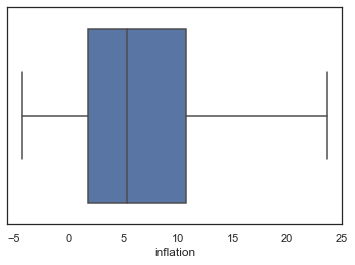

In [16]:
sns.boxplot(x='inflation', data=df)

In [17]:
Q1 = df['life_expec'].quantile(0.02)

df['life_expec'][df['life_expec'] <= Q1]=Q1

df.shape

(167, 10)

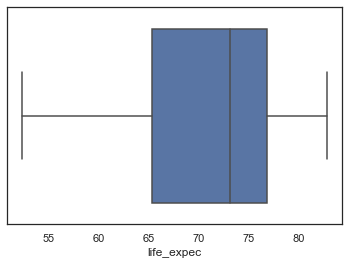

In [18]:
sns.boxplot(x='life_expec', data=df)

In [19]:
Q4 = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer'] >= Q4]=Q4
df.shape


(167, 10)

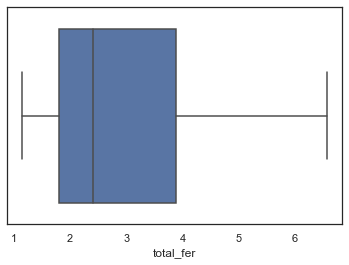

In [20]:
sns.boxplot(x='total_fer', data=df)

In [21]:
Q4 = df['gdpp'].quantile(0.85)
df['gdpp'][df['gdpp'] >= Q4]=Q4
df.shape

(167, 10)

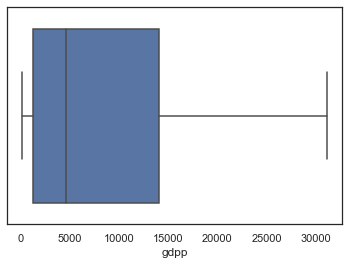

In [22]:
sns.boxplot(x='gdpp', data=df)

In [23]:
Y=df['country']
# removing the country for the PCA analysis

In [24]:
df2= df1.drop('country', axis=1)

In [25]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9)
memory usage: 11.8 KB
None


Applying the standard scaler and scaling all the numerical columns

In [26]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df3 = standard_scaler.fit_transform(df2)

In [27]:
df3.max()

2.534118080579271

In [28]:
#checking the variance 

100*df2.var()/sum(df2.var())

child_mort    4.144239e-04
exports       1.284068e-04
health        2.061438e-06
imports       1.137406e-04
income        6.430452e+01
inflation     1.306177e-05
life_expec    2.039977e-05
total_fer     6.602263e-07
gdpp          3.569479e+01
dtype: float64

In [29]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state =42)
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
#first coponent of the first vector obtained from pca.components_
pca.components_[0][0]

-0.41993471380885367

In [31]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.49318936, 0.16377964, 0.13763064, 0.09333062, 0.06473377,
       0.01926046, 0.01591411, 0.00896491, 0.00319648])

Text(0, 0.5, 'Cumulative Variance')

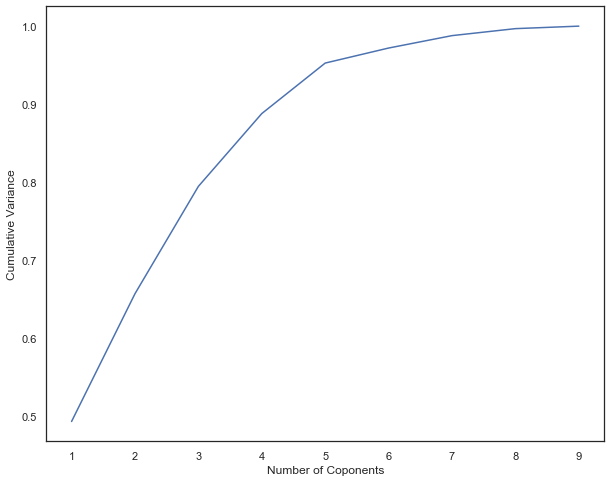

In [32]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

<BarContainer object of 9 artists>

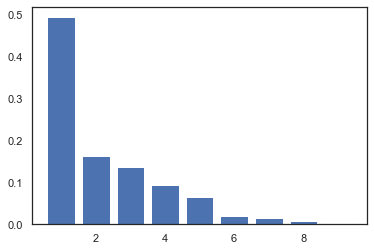

In [33]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

# Run PCA components with 5 as there is bent near 5 

In [34]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [35]:
df_pca = pca_final.fit_transform(df3)
df_pca.shape

(167, 5)

In [36]:
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [37]:
pca_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.234466,-0.262520,1.040764,0.792771,-0.042866
1,0.444781,-0.182664,0.319087,-1.393728,0.192975
2,-0.413538,-0.628562,-1.630752,-0.618805,0.563179
3,-3.368252,1.032355,-2.187211,1.733318,0.111973
4,1.286826,0.589943,0.138072,-0.695091,-0.389084


In [38]:
pca_df2 = pd.DataFrame({'country': list(Y),'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})
#added the country column back 

In [39]:
pca_df2.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-3.234466,-0.262520,1.040764,0.792771,-0.042866
1,Albania,0.444781,-0.182664,0.319087,-1.393728,0.192975
2,Algeria,-0.413538,-0.628562,-1.630752,-0.618805,0.563179
3,Angola,-3.368252,1.032355,-2.187211,1.733318,0.111973
4,Antigua and Barbuda,1.286826,0.589943,0.138072,-0.695091,-0.389084


# Clustering

In [40]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
hopkins(pca_df2.drop('country', axis = 1))

0.7498356036545146

In [42]:
dat3_1 = pca_df2.drop('country', axis = 1)

In [43]:
dat3_1.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.234466,-0.262520,1.040764,0.792771,-0.042866
1,0.444781,-0.182664,0.319087,-1.393728,0.192975
2,-0.413538,-0.628562,-1.630752,-0.618805,0.563179
3,-3.368252,1.032355,-2.187211,1.733318,0.111973
4,1.286826,0.589943,0.138072,-0.695091,-0.389084


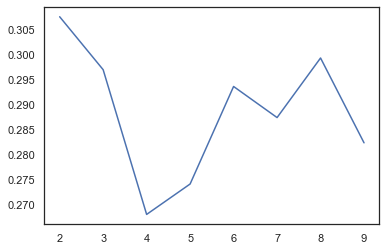

In [44]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);


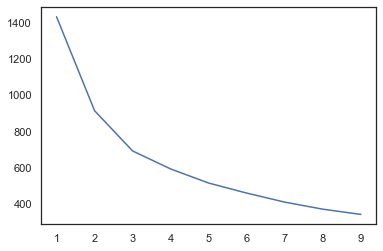

In [45]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(dat3_1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [46]:
# silhouette analysis
from sklearn.metrics import silhouette_score

for num_clusters in list(range(2,10)):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3076653161186857
For n_clusters=3, the silhouette score is 0.2970740194299999
For n_clusters=4, the silhouette score is 0.26864363537781133
For n_clusters=5, the silhouette score is 0.2735138880882302
For n_clusters=6, the silhouette score is 0.2925727573060393
For n_clusters=7, the silhouette score is 0.2856387286294381
For n_clusters=8, the silhouette score is 0.2931667655991551
For n_clusters=9, the silhouette score is 0.28124160427197564


In [47]:
# performed the clustering with 3 as per the silhouette and elbow curve 
model_clus2 = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [48]:
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_clus2.labels_)], axis = 1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km.head()
# added the cluster ID to the Data set 

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-3.234466,-0.262520,1.040764,0.792771,-0.042866,0
1,Albania,0.444781,-0.182664,0.319087,-1.393728,0.192975,1
2,Algeria,-0.413538,-0.628562,-1.630752,-0.618805,0.563179,1
3,Angola,-3.368252,1.032355,-2.187211,1.733318,0.111973,0
4,Antigua and Barbuda,1.286826,0.589943,0.138072,-0.695091,-0.389084,1


In [49]:
dat_km['ClusterID'].value_counts()
# the cluster which require the aid has 79 countries


1    79
0    47
2    41
Name: ClusterID, dtype: int64

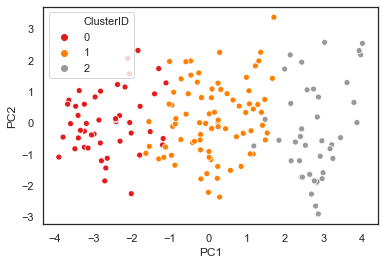

In [50]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='ClusterID', legend = 'full', data = dat_km, palette='Set1')
#all the clusters are seperated mostly and are not overlapping 

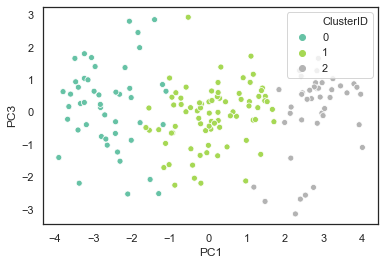

In [51]:
sns.scatterplot(x = 'PC1', y = 'PC3', hue ='ClusterID', legend = 'full', data = dat_km, palette='Set2')

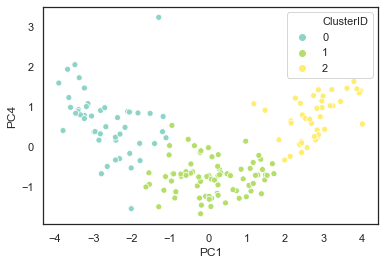

In [52]:
sns.scatterplot(x = 'PC1', y = 'PC4', hue ='ClusterID', legend = 'full', data = dat_km, palette='Set3')

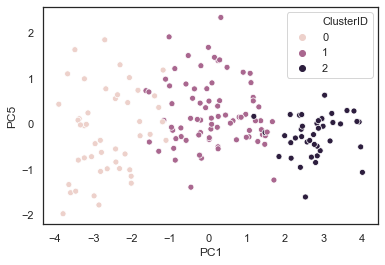

In [53]:
sns.scatterplot(x = 'PC1', y = 'PC5', hue ='ClusterID', legend = 'full', data = dat_km)

# Cluster Profiling

In [54]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(df1, dat_km, how = 'inner', on = 'country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-3.234466,-0.262520,1.040764,0.792771,-0.042866,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.444781,-0.182664,0.319087,-1.393728,0.192975,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.413538,-0.628562,-1.630752,-0.618805,0.563179,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,-3.368252,1.032355,-2.187211,1.733318,0.111973,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.286826,0.589943,0.138072,-0.695091,-0.389084,1


In [55]:
dat5.drop(['PC1','PC2','PC3','PC4','PC5'], axis=1 , inplace = True)
# dropped the PCA components and mapped with the original data

In [56]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [57]:
dat5.drop('country', axis = 1).groupby('ClusterID').mean()
# grouped by the clusterID and checked the mean to get the information that which cluster  requires the aid 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,89.953191,28.225936,6.253830,41.058168,3738.574468,10.181340,60.059745,4.977813,1808.297872
1,22.510127,39.367316,6.306000,47.603392,11198.101266,7.164949,72.546835,2.324177,5771.189873
2,5.651220,52.169561,8.316195,46.953756,38244.146341,3.235171,79.514634,1.799756,27725.609756


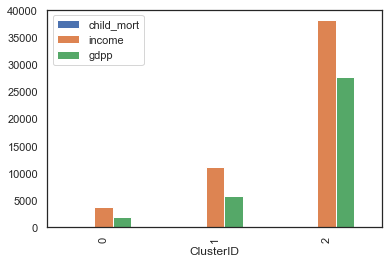

In [58]:
dat5.drop('country', axis = 1)[['child_mort','income','gdpp', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')
# plotted the bar chart for visualization

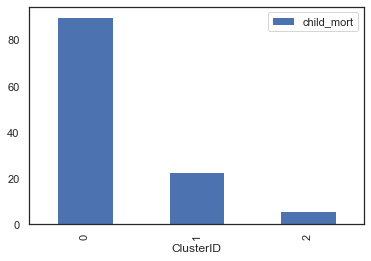

In [59]:
dat5.drop('country', axis = 1)[['child_mort', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')
#plotted the separate bar chart for the child mort as the values are less

# Finding the observations that belong to certain cluster

In [60]:
#Let's use the concept of binning
dat5[dat5['ClusterID']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107     

In [61]:
dat5[dat5['ClusterID']==0].sort_values(by=['gdpp','child_mort','income'], ascending=[ True, False, True]) 
# sorted the values according for the five countries which require the aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.60,8.920,11.60,39.2000,764.0,12.300,57.700,6.2600,231.0,0
88,Liberia,89.30,19.100,11.80,92.6000,700.0,5.470,60.800,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.00,41.100,7.91,49.6000,609.0,20.800,57.500,6.5400,334.0,0
112,Niger,123.00,22.200,5.16,49.1000,814.0,2.550,58.800,6.5636,348.0,0
132,Sierra Leone,130.14,16.800,13.10,34.5000,1220.0,17.200,55.000,5.2000,399.0,0
93,Madagascar,62.20,25.000,3.77,43.0000,1390.0,8.790,60.800,4.6000,413.0,0
106,Mozambique,101.00,31.500,5.21,46.2000,918.0,7.640,54.500,5.5600,419.0,0
31,Central African Republic,130.14,11.800,3.98,26.5000,888.0,2.010,52.352,5.2100,446.0,0
94,Malawi,90.50,22.800,6.59,34.9000,1030.0,12.100,53.100,5.3100,459.0,0
50,Eritrea,55.20,4.790,2.66,23.3000,1420.0,11.600,61.700,4.6100,482.0,0


# Hierarchical Clustering

In [62]:
dat3_1.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.234466,-0.262520,1.040764,0.792771,-0.042866
1,0.444781,-0.182664,0.319087,-1.393728,0.192975
2,-0.413538,-0.628562,-1.630752,-0.618805,0.563179
3,-3.368252,1.032355,-2.187211,1.733318,0.111973
4,1.286826,0.589943,0.138072,-0.695091,-0.389084


In [63]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [65]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

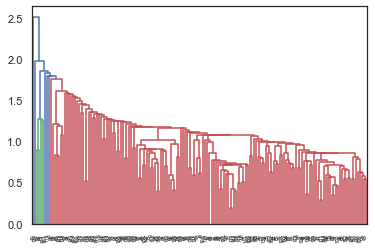

In [66]:
mergings = linkage(dat3_1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()
#single linkage

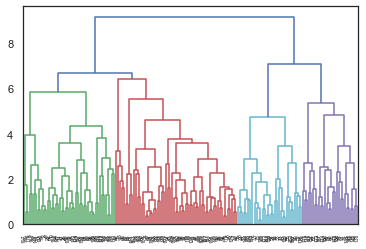

In [67]:
mergings = linkage(dat3_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()
#complete linkage

In [68]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels
#got the cluster labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [69]:
dat5['cluster_labels'] = cluster_labels
dat5.head()
# added the cluster labels to the server

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,0


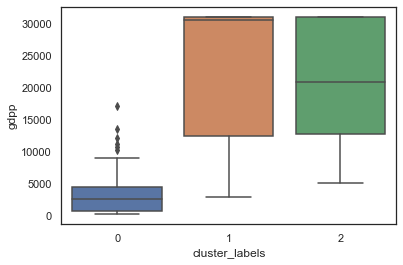

In [70]:
sns.boxplot(x='cluster_labels', y='gdpp', data=dat5)

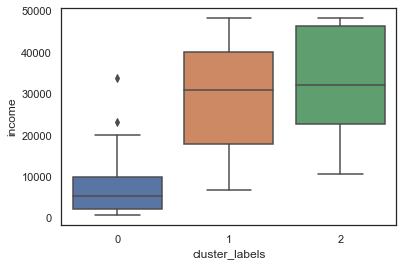

In [71]:
sns.boxplot(x='cluster_labels', y='income', data=dat5)

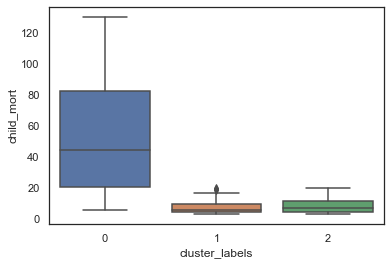

In [72]:
sns.boxplot(x='cluster_labels', y='child_mort', data=dat5)

In [73]:
dat5[dat5['cluster_labels']==0].sort_values(by=['gdpp','child_mort','income'], ascending=[ True, False, True]) 
# sorted the values for 5 countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
26,Burundi,93.60,8.92,11.60,39.2,764.0,12.300,57.700,6.2600,231.0,0,0
88,Liberia,89.30,19.10,11.80,92.6,700.0,5.470,60.800,5.0200,327.0,0,0
37,"Congo, Dem. Rep.",116.00,41.10,7.91,49.6,609.0,20.800,57.500,6.5400,334.0,0,0
112,Niger,123.00,22.20,5.16,49.1,814.0,2.550,58.800,6.5636,348.0,0,0
132,Sierra Leone,130.14,16.80,13.10,34.5,1220.0,17.200,55.000,5.2000,399.0,0,0
93,Madagascar,62.20,25.00,3.77,43.0,1390.0,8.790,60.800,4.6000,413.0,0,0
106,Mozambique,101.00,31.50,5.21,46.2,918.0,7.640,54.500,5.5600,419.0,0,0
31,Central African Republic,130.14,11.80,3.98,26.5,888.0,2.010,52.352,5.2100,446.0,0,0
94,Malawi,90.50,22.80,6.59,34.9,1030.0,12.100,53.100,5.3100,459.0,0,0
50,Eritrea,55.20,4.79,2.66,23.3,1420.0,11.600,61.700,4.6100,482.0,0,0
